# Unit 5 - Financial Planning

In [44]:
# Initial imports
# We are importing json to help read requests
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [45]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [46]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [47]:
# Crypto API URLs
# There is no AUD conversion for this api so we will just use CAD as per specs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [48]:
# Fetch current BTC price
# Convert straight to json to extract data
btc_request = requests.get(btc_url).json()

#These are the prints used to find the price of BTC in CAD for reference
#print(json.dumps(btc_request, indent=4))
#print(btc_request["data"]["1"]["quotes"]["CAD"]["price"])

btc_price = btc_request["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
# Convert straight to json to extract data
eth_request = requests.get(eth_url).json()

#These are the prints used to find the price of ETH in CAD for reference
#print(json.dumps(eth_request, indent=4))
#print(eth_request["data"]["1027"]["quotes"]["CAD"]["price"])

eth_price = eth_request["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $56940.96
The current value of your 5.3 ETH is $16474.68


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [49]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [50]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [60]:
# Format current date as ISO format
# not specifying start date to get all available data
end_date = pd.Timestamp("2022-01-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_shares = api.get_barset(
    tickers,
    timeframe,
    end=end_date,
    limit=1000
).df

# Preview DataFrame
df_shares.tail()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2021-12-27 00:00:00-05:00  114.15  114.30  114.13  114.27  5069840.0  472.03   
2021-12-28 00:00:00-05:00  114.43  114.45  114.17  114.22  4892072.0  477.72   
2021-12-29 00:00:00-05:00  113.99  114.05  113.81  113.87  5712959.0  477.00   
2021-12-30 00:00:00-05:00  113.99  114.13  113.83  114.12  5044053.0  477.93   
2021-12-31 00:00:00-05:00  114.15  114.31  114.06  114.09  6557778.0  475.64   

                                                               
                             high     low   close      volume  
time                                                           
2021-12-27 00:00:00-05:00  477.31  472.01  477.27  46260198.0  
2021-12-28 00:00:00-05:00  478.81  476.06  476.89  37370466.0  
2021-12-29 00:00:00-05:00  478.56  475.92  477.46  47223213.0  
2021-12-30 00:00:00-05:00  479.00  475.67  476.15  44681636.0  
2021-12-31 00:00:00-05:00  476.86  474.67  474.89  51212452.0

In [61]:
# Pick AGG and SPY close prices
agg_close_price = df_shares.iloc[-1]["AGG"]["close"]
spy_close_price = df_shares.iloc[-1]["SPY"]["close"]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.09
Current SPY closing price: $474.89


In [62]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23744.50
The current value of your 200 AGG shares is $22818.00


### Savings Health Analysis

In [80]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame({"amount": [crypto_value, shares_value]}, index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,73415.641088
shares,46562.500000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

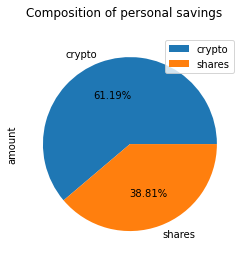

In [94]:
# Plot savings pie chart
df_savings.plot(kind="pie", subplots=True, title="Composition of personal savings", autopct="%0.2f%%")

In [108]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value

# Validate saving health

# If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.
# If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.
# If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.

# Print a leading info statement
print(f"Your savings are {total_savings:.2f} and your ideal emergency fund size is {emergency_fund}.")
if total_savings > emergency_fund:
    print("Well done for saving enough money for your emergency fund")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goal")
else:
    print(f"You are short of your ideal emergency fund size by {emergency_fund - total_savings}")

Your savings are 119978.14 and your ideal emergency fund size is 36000.
Well done for saving enough money for your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [113]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
# Copying end date from above
start_date = pd.Timestamp('2017-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-01', tz='America/New_York').isoformat()

In [114]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high      low     close     volume   
time                                                                       
2018-01-11 00:00:00-05:00  108.66  108.860  108.610  108.7700  2652838.0   
2018-01-12 00:00:00-05:00  108.64  108.830  108.630  108.7401  2950016.0   
2018-01-16 00:00:00-05:00  108.87  108.980  108.715  108.7600  6011248.0   
2018-01-17 00:00:00-05:00  108.73  108.839  108.620  108.6500  2880481.0   
2018-01-18 00:00:00-05:00  108.43  108.525  108.350  108.3800  2681682.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2018-01-11 00:00:00-05:00     NaN     NaN     NaN     NaN         NaN  
2018-01-12 00:00:00-05:00  276.42  278.11  276.27  277.91  53855427.0  
2018-01-16 00:00:00-05:00  279.35  280.09  276.18  276.96  70240852.0  
2018-01-17 00:00:00-05:00  278.04  280.05  277.19  279.61  62162956.0  
2018-01-18 00:00:00-05:00  279.50  279.96  278.58  279.18  57402163.0

In [115]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Configure Monte Carlo simulation for 40% AGG, 60% SPY, running 500 times for a period of 30 years of 252 trading days
mc_simulator = MCSimulation(df_stock_data, [0.4, 0.6], 500,  252*30)

In [127]:
# Printing the simulation input data
mc_simulator.portfolio_data.head()

AGG                                         \
                             open     high      low     close     volume   
time                                                                       
2018-01-11 00:00:00-05:00  108.66  108.860  108.610  108.7700  2652838.0   
2018-01-12 00:00:00-05:00  108.64  108.830  108.630  108.7401  2950016.0   
2018-01-16 00:00:00-05:00  108.87  108.980  108.715  108.7600  6011248.0   
2018-01-17 00:00:00-05:00  108.73  108.839  108.620  108.6500  2880481.0   
2018-01-18 00:00:00-05:00  108.43  108.525  108.350  108.3800  2681682.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-11 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-01-12 00:00:00-05:00    -0.000275  276.42  278.11  276.27  277.91   
2018-01-16 00:00:00-05:00     0.000183  279.35  280.09  276.18  276.96   
2018-01-17 00:00:00-05:00    -0.001011  278.04  280.05  277.19  279.61   
2018-01-18 00:00:00-05:00    -0.002485  279.50  279.96  278.58  279.18   

                                                    
                               volume daily_return  
time                                                
2018-01-11 00:00:00-05:00         NaN          NaN  
2018-01-12 00:00:00-05:00  53855427.0          NaN  
2018-01-16 00:00:00-05:00  70240852.0    -0.003418  
2018-01-17 00:00:00-05:00  62162956.0     0.009568  
2018-01-18 00:00:00-05:00  57402163.0    -0.001538

In [118]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_simulator.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Kevin\OneDrive\desktop\FinTech\Homework\Personal_Finance_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002455,0.979714,1.002105,0.996761,1.000203,0.998763,1.004707,0.990793,0.990792,0.995805,...,1.001221,0.994570,1.009276,0.987119,0.991989,0.998892,1.000738,0.995245,1.003785,0.984661
2,1.001997,0.981317,1.009841,0.997463,1.001824,0.996885,1.001446,0.994464,0.984276,0.990994,...,0.985686,0.981781,1.013521,0.969545,0.995050,0.997362,0.999660,0.985583,1.000785,0.987454
3,1.001006,0.990472,1.017985,0.996577,1.014217,0.994768,1.011150,0.993414,0.976212,0.998065,...,0.992167,0.975867,1.015562,0.968943,0.989102,0.985906,0.989291,0.984077,0.987264,0.999589
4,1.002477,1.002511,1.003363,0.989543,1.018552,1.006369,1.015563,0.999788,0.965664,1.001398,...,0.995099,0.982169,1.007149,0.978196,0.987998,0.998431,1.007340,0.981153,0.974822,1.010282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.585158,23.640887,9.755604,29.325339,20.749126,33.435200,6.495917,13.552598,12.916091,3.928460,...,27.152701,10.879564,54.713258,9.707022,12.471173,30.769506,6.860325,25.084649,25.037835,29.711616
7557,17.735407,23.962534,9.750422,29.162883,20.912160,33.750363,6.470118,13.552847,13.000230,3.989933,...,27.016689,10.867353,55.263716,9.663730,12.228337,31.171604,6.937218,25.237116,25.277391,29.586361
7558,17.694708,23.845075,9.737880,29.575215,21.177803,33.580853,6.514650,13.742521,13.038562,3.973742,...,27.220930,10.889629,55.559373,9.806795,12.127280,31.321035,6.917277,25.100813,25.272499,29.848026
7559,17.613775,23.762422,9.825777,29.459354,21.228284,33.860648,6.452923,13.801614,12.898507,3.944117,...,26.932709,10.840625,56.300719,9.792307,12.027964,31.540120,6.952047,25.250112,25.166065,29.677942


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

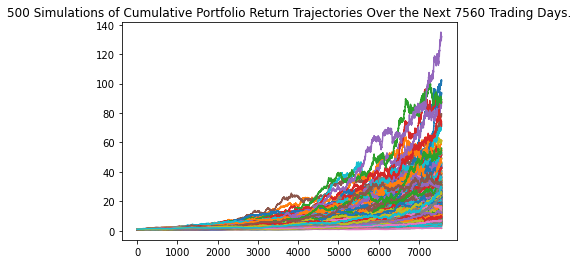

In [119]:
# Plot simulation outcomes
mc_simulator.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

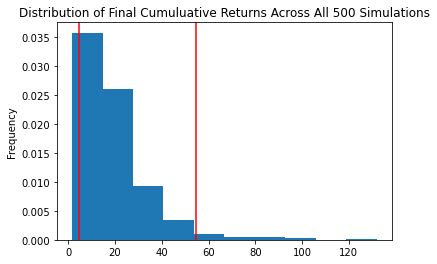

In [120]:
# Plot probability distribution and confidence intervals
mc_simulator.plot_distribution()

### Retirement Analysis

In [123]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_results = mc_simulator.summarize_cumulative_return()

# Print summary statistics
print(simulation_results)

count           500.000000
mean             19.632252
std              15.029711
min               1.724217
25%              10.036496
50%              15.386113
75%              25.021895
max             131.825288
95% CI Lower      4.469229
95% CI Upper     54.755761
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [125]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = simulation_results[8] * initial_investment
ci_upper = simulation_results[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89384.58038216869 and $1095115.2206974071


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [128]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = simulation_results[8] * initial_investment
ci_upper = simulation_results[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $134076.87057325302 and $1642672.8310461107


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [129]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Configure Monte Carlo simulation for 40% AGG, 60% SPY, running 500 times for a period of 5 years of 252 trading days
mc_simulator_5y = MCSimulation(df_stock_data, [0.4, 0.6], 500,  252*5)

In [130]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_simulator_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Kevin\OneDrive\desktop\FinTech\Homework\Personal_Finance_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001623,1.004084,0.999731,1.010643,1.003963,0.989588,0.998076,1.001191,0.987938,0.996571,...,1.009082,0.993309,0.996739,1.000353,0.988181,1.003472,0.991371,0.991852,1.008541,0.995875
2,1.013691,1.007725,1.004932,1.010938,0.988163,0.965299,0.991659,0.991344,0.986396,0.997061,...,1.009640,0.993216,1.003849,0.991469,0.986444,1.000323,0.986420,0.993754,1.015255,1.003193
3,1.023502,1.008064,1.002129,1.016111,1.000446,0.964422,0.994172,0.992118,0.981027,1.001930,...,0.999323,0.990622,1.008745,0.983812,0.988056,1.001631,0.987826,0.991356,1.013313,1.008975
4,1.024061,1.004870,0.993243,1.013326,0.987670,0.968871,0.996807,0.978207,0.974457,0.998090,...,0.990099,1.003183,1.006025,0.990935,0.991992,1.009831,0.989321,0.984719,1.011600,1.000825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.620440,0.807254,1.067881,1.965733,2.944948,1.060919,1.799936,1.771765,2.296573,1.933820,...,2.161684,0.934934,1.150785,1.708197,1.482602,1.829505,1.445770,2.301354,1.666291,4.401812
1257,1.616237,0.821609,1.078300,1.990347,2.924025,1.073446,1.805635,1.792884,2.305107,1.948573,...,2.193629,0.941399,1.159287,1.705936,1.490550,1.831434,1.468741,2.301383,1.645723,4.358995
1258,1.593960,0.828550,1.069807,2.002139,2.916543,1.076163,1.795888,1.785984,2.337392,1.954322,...,2.196336,0.945596,1.162344,1.714615,1.474788,1.861018,1.464711,2.292620,1.647314,4.365725
1259,1.567312,0.830482,1.073672,2.031494,2.938311,1.062990,1.820277,1.795295,2.364866,1.945909,...,2.169954,0.940471,1.173543,1.715520,1.473938,1.866332,1.462144,2.280935,1.634020,4.356918


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

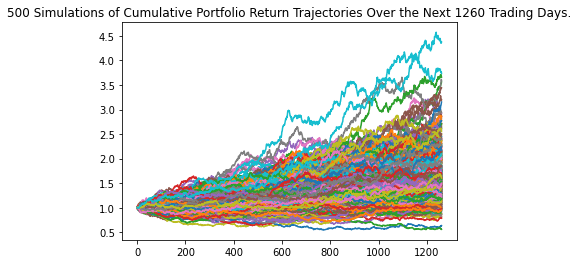

In [131]:
# Plot simulation outcomes
mc_simulator_5y.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

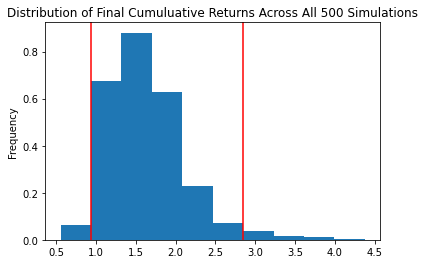

In [132]:
# Plot probability distribution and confidence intervals
mc_simulator_5y.plot_distribution()

In [136]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_results_5y = mc_simulator_5y.summarize_cumulative_return()

# Print summary statistics
print(simulation_results_5y)

count           500.000000
mean              1.636432
std               0.497204
min               0.557367
25%               1.281051
50%               1.585839
75%               1.867128
max               4.375299
95% CI Lower      0.942167
95% CI Upper      2.843934
Name: 1260, dtype: float64


In [138]:
# Set initial investment
# Set the same investment as previous simulation
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = simulation_results_5y[8] * initial_investment
ci_upper_five = simulation_results_5y[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18843.333316160704 and $56878.674359206765


### Ten Years Retirement Option

In [139]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Configure Monte Carlo simulation for 40% AGG, 60% SPY, running 500 times for a period of 10 years of 252 trading days
mc_simulator_10y = MCSimulation(df_stock_data, [0.4, 0.6], 500,  252*10)

In [140]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_simulator_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Kevin\OneDrive\desktop\FinTech\Homework\Personal_Finance_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004181,0.993900,1.007159,1.003309,1.004432,1.000695,0.997262,0.998845,0.997207,1.011894,...,1.013159,0.988923,0.997538,0.994216,1.001005,0.996817,1.007298,1.005539,0.984743,1.007598
2,1.008453,0.997898,1.009407,1.005048,1.003419,1.004781,0.992368,0.995874,1.008713,1.015356,...,1.008016,0.982951,1.009292,0.993423,0.996099,0.988500,1.009475,0.998435,0.990570,0.994154
3,0.996770,1.000552,1.013672,1.000624,1.003760,1.016658,0.993945,1.000743,1.010753,1.013825,...,1.018245,0.984281,1.000048,1.009314,0.990035,0.994221,1.010423,0.996272,0.986266,0.991089
4,1.010847,1.018585,1.027160,0.994958,1.007298,1.021813,1.005540,0.991656,1.011079,1.007043,...,1.019888,0.989025,1.001538,1.022692,0.989227,0.994205,1.002558,1.010127,0.980385,1.001938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.288353,5.304353,5.292508,1.654932,1.290844,3.476844,2.322663,3.031551,2.263723,2.614731,...,1.275633,2.256974,3.057176,2.495282,1.370549,2.522915,5.733120,6.042955,2.223390,3.031105
2517,3.283142,5.272540,5.312465,1.675286,1.291519,3.469729,2.327374,3.053818,2.283634,2.619396,...,1.268752,2.253392,3.094282,2.499113,1.380008,2.523528,5.746242,5.982636,2.234260,3.018172
2518,3.307078,5.269935,5.295260,1.665805,1.296104,3.460887,2.337730,3.059742,2.305991,2.588181,...,1.260352,2.238266,3.087489,2.493855,1.382876,2.495099,5.780637,6.033616,2.208584,3.015978
2519,3.300375,5.310483,5.268655,1.662092,1.272921,3.448379,2.311287,3.059197,2.283190,2.581937,...,1.268440,2.228846,3.039173,2.472763,1.382213,2.484974,5.762854,6.084628,2.216982,3.004493


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

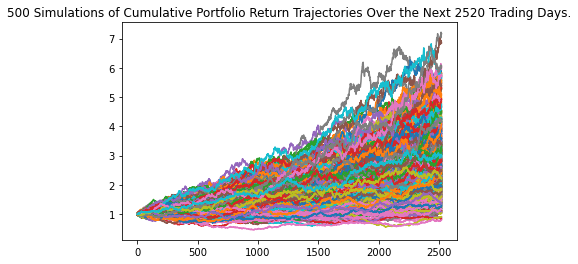

In [141]:
# Plot simulation outcomes
mc_simulator_10y.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

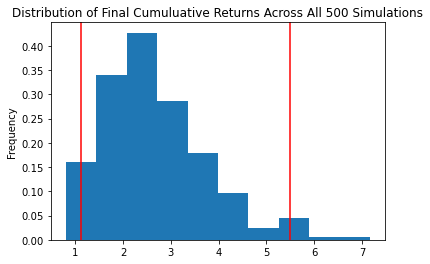

In [142]:
# Plot probability distribution and confidence intervals
mc_simulator_10y.plot_distribution()

In [143]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_results_10y = mc_simulator_10y.summarize_cumulative_return()

# Print summary statistics
print(simulation_results_10y)

count           500.000000
mean              2.674259
std               1.070960
min               0.800121
25%               1.881398
50%               2.493870
75%               3.243381
max               7.169467
95% CI Lower      1.110816
95% CI Upper      5.482649
Name: 2520, dtype: float64


In [145]:
# Set initial investment
# Set the same investment as previous simulation
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = simulation_results_10y[8] * initial_investment
ci_upper_ten = simulation_results_10y[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $22216.326325652655 and $109652.970563508
